In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

Basic 

Optizisation

In [2]:
from scipy.optimize import minimize  # minimization

In [3]:
def f(x):
    return (x-2)**2 
res=minimize(f,0)

In [4]:
res.x[0]

1.9999999820005778

2nd problem

In [5]:
f= lambda x: (x[0]-1)**2 + (x[1]-2.5)**2

cons=(
    {'type':'ineq','fun':lambda x: x[0]-2*x[1]+2},
        {'type':'ineq','fun':lambda x: -x[0]-2*x[1]+6},
            {'type':'ineq','fun':lambda x: -x[0]+2*x[1]+2})


bnds=((0,None),(0,None))
res=minimize(f,(2,0),bounds=bnds,constraints=cons)


In [6]:
res


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.8000000011920985
       x: [ 1.400e+00  1.700e+00]
     nit: 3
     jac: [ 8.000e-01 -1.600e+00]
    nfev: 10
    njev: 3

interpolation

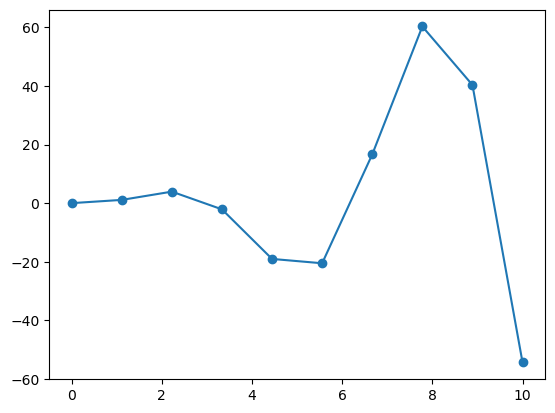

In [7]:
x=np.linspace(0,10,10)
y=x**2 *np.sin(x)

plt.scatter(x,y)
plt.plot(x,y)

In [8]:
from scipy.interpolate import interp1d

In [9]:
f=interp1d(x,y,kind='cubic')
x_dense=np.linspace(0,10,100)
y_dense=f(x_dense)


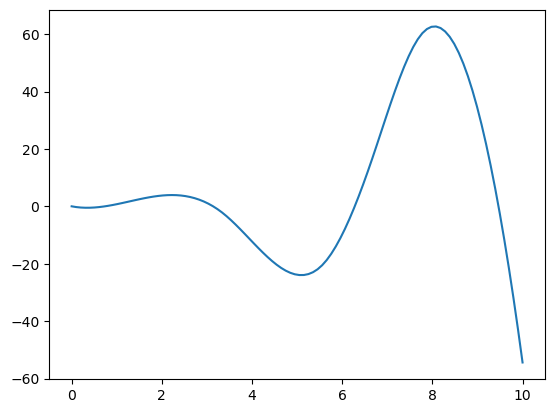

In [10]:
plt.plot(x_dense,y_dense)

In [11]:
from scipy.optimize import curve_fit

problem 1

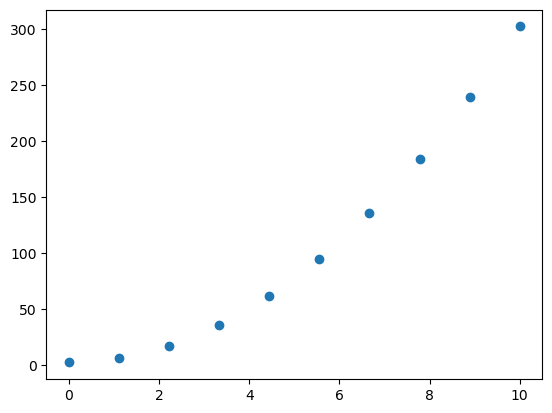

In [12]:
x_data=np.linspace(0,10,10)
y_data=3*x_data**2 +2

plt.scatter(x_data,y_data)

In [13]:
def func(x,a,b):
    return a*x**2 + b



In [14]:
popt,pcov=curve_fit(func,x_data,y_data)

In [15]:
popt

array([3., 2.])

problem 2

In [16]:


t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])



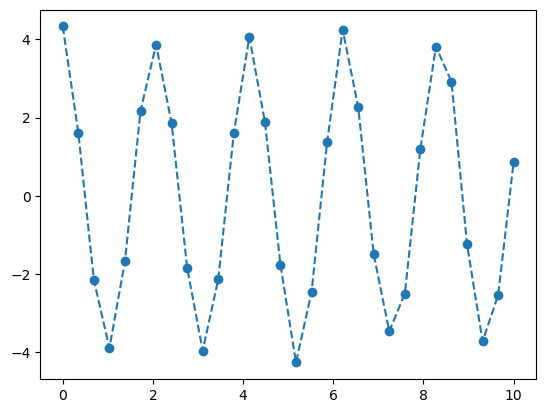

In [17]:
plt.plot(t_data,y_data,'o--')

In [18]:
def func1(t,A,f,phi):
    return A*np.sin(2*np.pi*f*t+phi)

# popt,pcov=curve_fit(func1,t_data,y_data)
popt,pcov=curve_fit(func1,t_data,y_data,p0=(4,.5,0))

In [19]:
np.sqrt(np.diag(pcov))  # standard deviation

# pcov

array([0.05117447, 0.00068573, 0.02575705])

In [20]:
A,w,phi=popt
w

0.4773049087550088

In [21]:
t=np.linspace(0,10,100)
y=func1(t,A,w,phi)

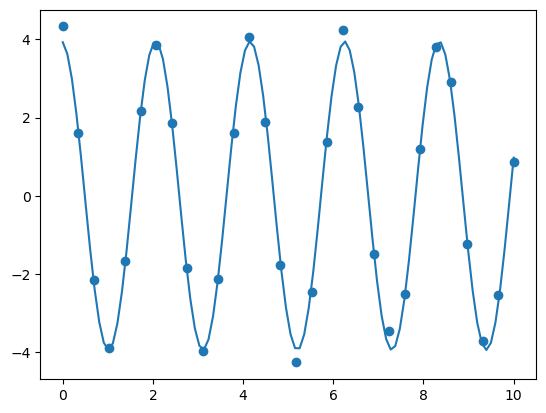

In [22]:
plt.scatter(t_data,y_data)
plt.plot(t,y)

calculus

diffrentiation

In [23]:
from scipy.misc import derivative

In [24]:
def f(x):
    return x**2 * np.sin(2*x) * np.exp(-x)

x=np.linspace(0,1,100)

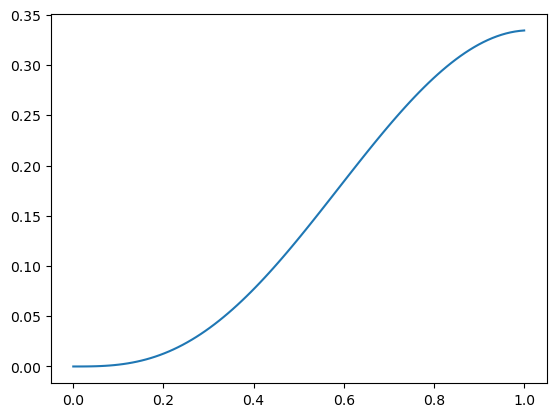

In [25]:
plt.plot(x,f(x))


In [26]:
dydx=derivative(f,x,dx=1e-6,n=1)

/tmp/ipykernel_12865/252862584.py:1: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  dydx=derivative(f,x,dx=1e-6,n=1)


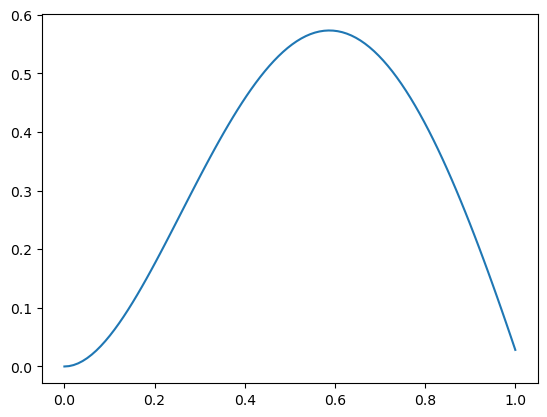

In [27]:
plt.plot(x,dydx)

In [28]:
from scipy.integrate import quad

In [29]:
integrand = lambda x: x**2 * np.sin(x) * np.exp(-x)
integral,integral_error=quad(integrand,0,1)


In [30]:
integral_error

1.1376208786903388e-15

In [31]:
from scipy.integrate import dblquad
integrand = lambda x,y: np.exp(-x**2-y**2)

lwr_y=lambda x: -x
upr_y=lambda x: x**2


integral1,integral_error1=dblquad(integrand,0,1,lwr_y,upr_y)


In [32]:
integral1

0.44946449410231304

In [33]:
from scipy.integrate import odeint